In [58]:
# lifetime of tempertures 
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 
from datetime import datetime
indy=pd.read_csv("indy.csv")

date=pd.to_datetime(indy["DATE"])
indy=indy.drop(["STATION"],axis=1)
indy=indy.drop(["DATE"],axis=1)
indy.index=date
#per = indy.date.dt.to_period("Y")
#s=set(indy.index.year)
#s=list(s)
#for elem in s:
    #print(int(elem))

1975
1976
1977
1978
1979
1980


In [111]:
def determine_leap(n):
    if n%4==0:
        if n%100==0:
            if n%400==0:
                return True
            else: return False
        else:return True
    else:return False

In [121]:
def read_data(path,name):
    name=pd.read_csv(path)
    date=pd.to_datetime(name["DATE"])
    name=name.drop(["STATION"],axis=1)
    name=name.drop(["DATE"],axis=1)
    name.index=date
    return name               

In [112]:
col=pd.date_range(start='9/21/1974',end='9/20/2017',freq="D")
years=np.arange(1975,2018)
print(len(col))

15706


In [113]:
def reindex(years):
    a=np.arange(1,367)
    b1=np.arange(1,60)
    b2=np.arange(61,367)
    b=np.append(b1,b2)
    day=np.array([])
    for elem in years:
        if determine_leap(elem)==True:
            day=np.append(day,a)
        else:
            day=np.append(day,b)
    return day
        

In [151]:
day=reindex(years)

In [160]:
new_df=pd.DataFrame(day,index=col,columns=['Day'])
new_df.index.name="DATE"

In [150]:
indy=read_data("indy.csv",indy)

In [169]:
pit=read_data("pit.csv","pit")


In [146]:
miami=read_data("Miami.csv","miami")
miami=miami.drop(['NAME'],axis=1)

In [147]:
chicago=read_data("chicago.csv","chicago")

In [148]:
wash=read_data("wash.csv","wash")

In [144]:
frames=[indy,pit,miami,wash,chicago]
result=pd.concat(frames)

In [164]:
result1=pd.merge(result,new_df,on="DATE")

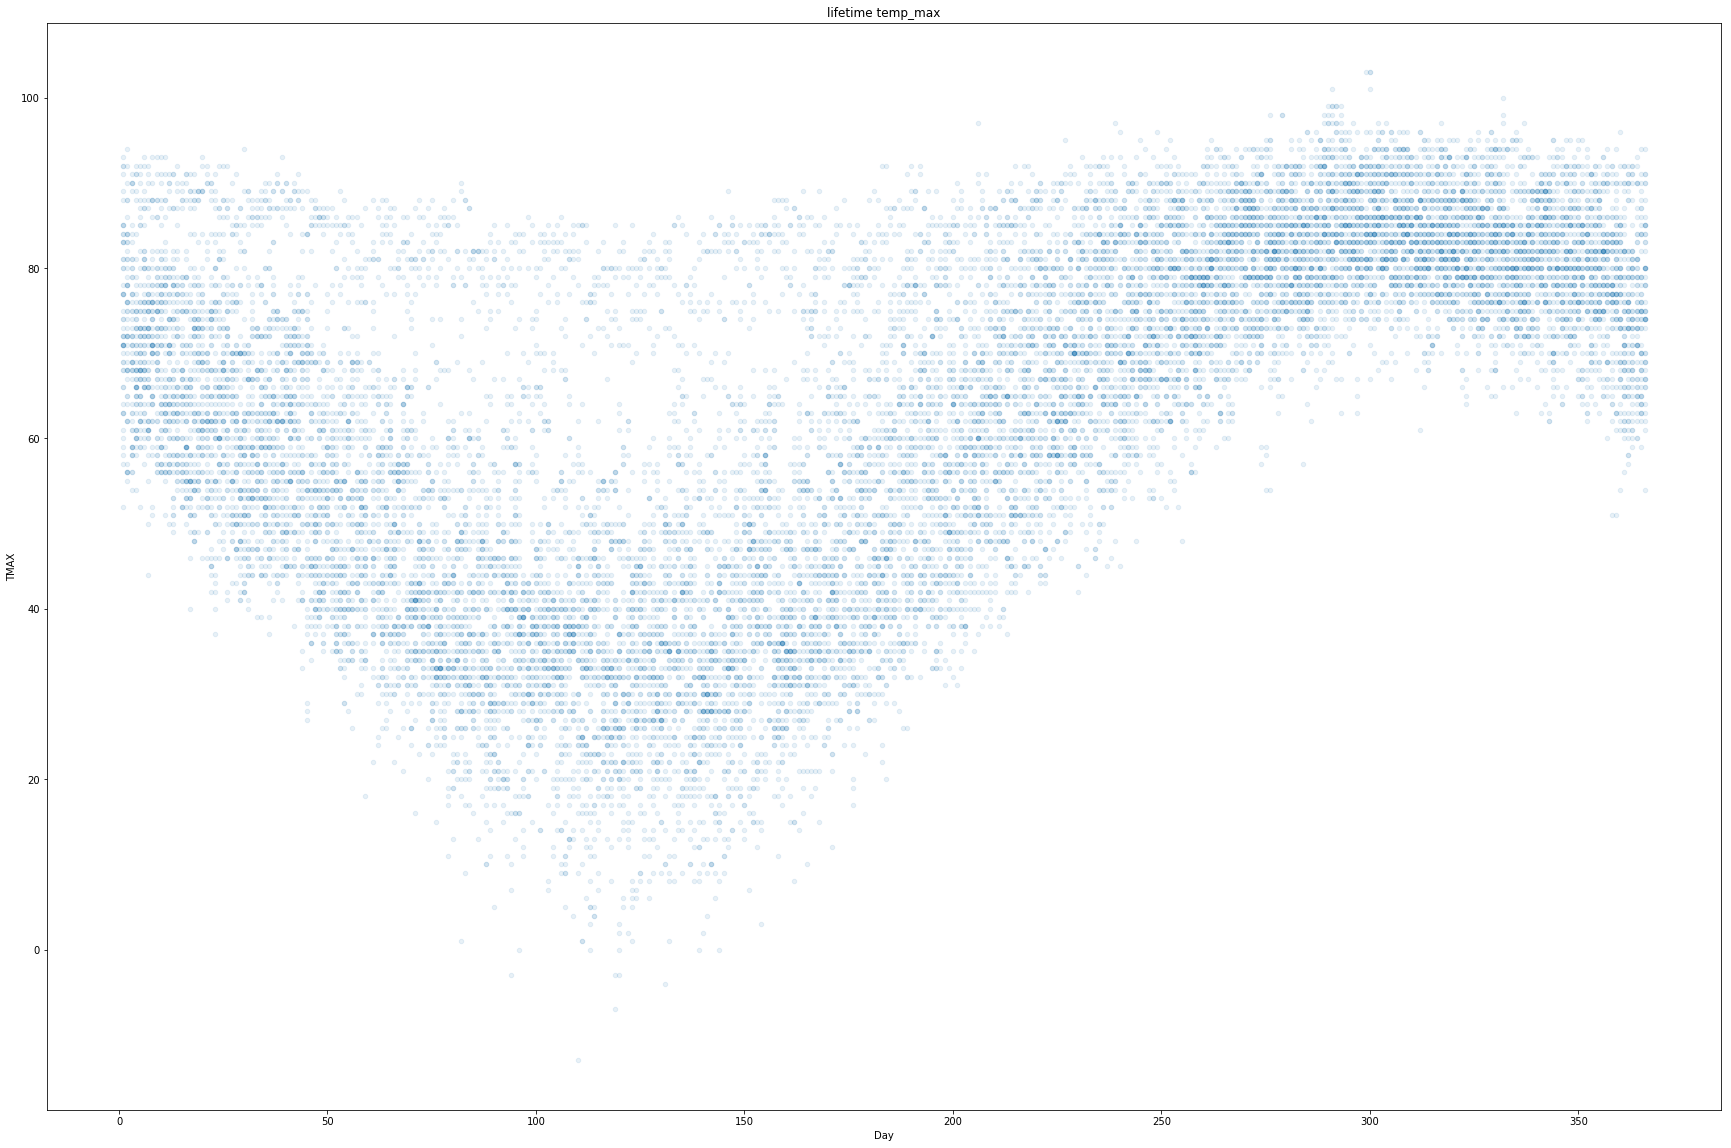

In [172]:
result1.plot(kind="scatter",x="Day",y="TMAX",title="lifetime temp_max",figsize=(30,20),alpha=0.1)




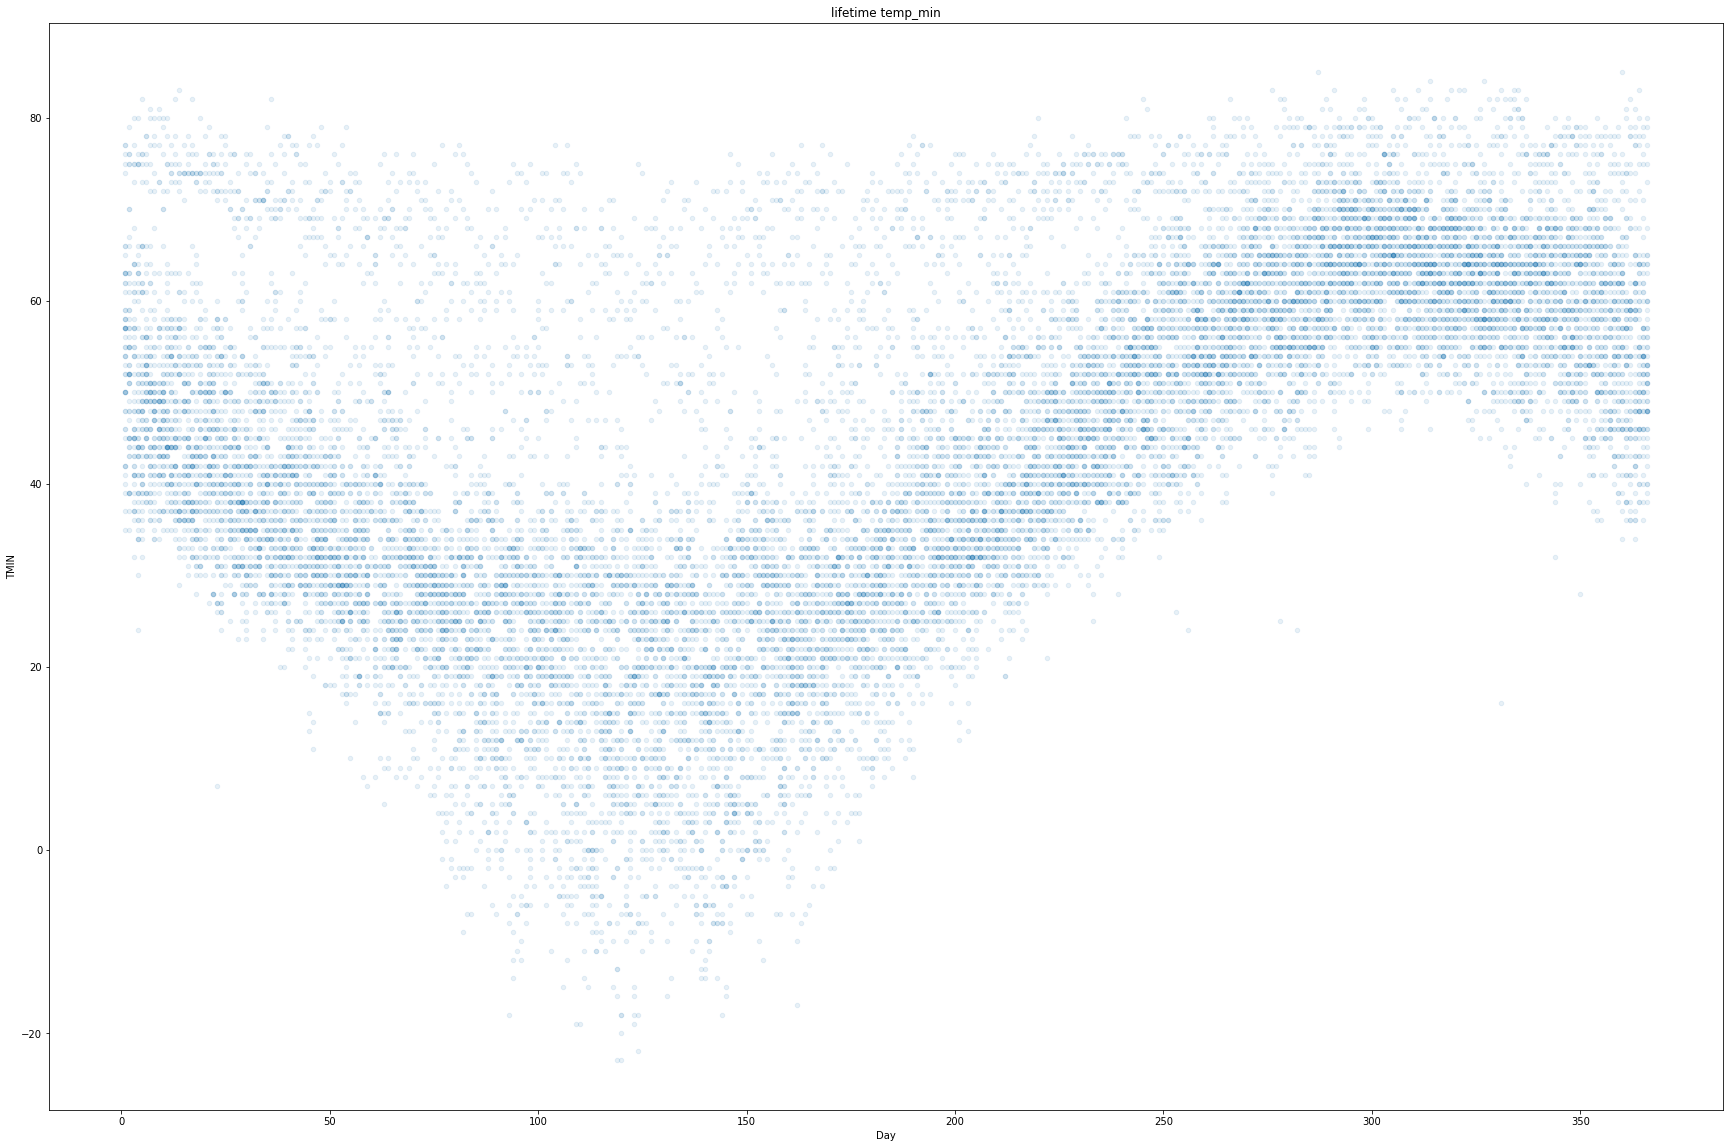

In [173]:
result1.plot(kind="scatter",x="Day",y="TMIN",title="lifetime temp_min",figsize=(30,20),alpha=0.1)

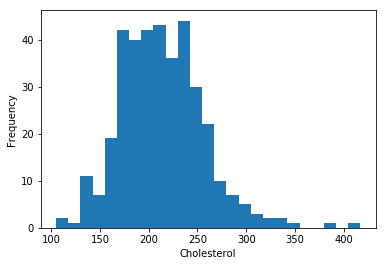

the midpoint of the bin with the highest frequency is:  236.04000000000002


In [46]:
# 3D histogram
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

lipids=pd.read_csv("lipids.csv",header=4)
lipdis=lipids[lipids['diseased']==1]
counts, bins, _ = plt.hist(lipids['chol'], bins=25)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()
print("the midpoint of the bin with the highest frequency is: ",bins[[counts.argmax(), counts.argmax()+1]].mean())

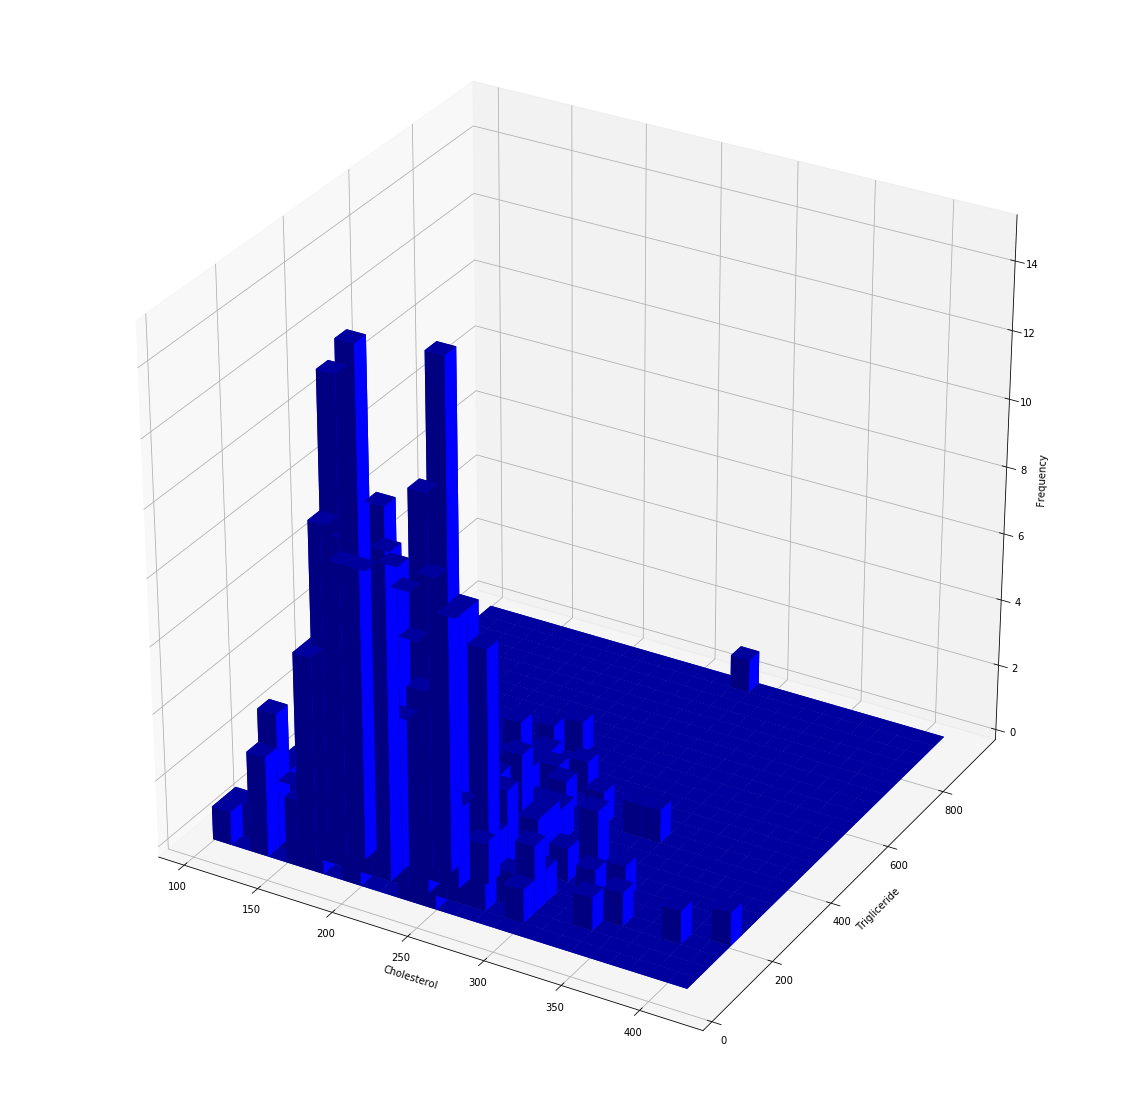

In [50]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(lipids['chol'], lipids['trig'], bins=25)
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)
dx = xedges[1] - xedges[0]
dy = yedges[1] - yedges[0]
dz = hist.flatten()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average',alpha=1)
plt.xlabel("Cholesterol")
plt.ylabel("Trigliceride")
ax.set_zlabel('Frequency')
plt.show()